In [1]:
import tensorflow as tf

# Check TensorFlow version
tf.__version__

'2.3.1'

In [14]:
# Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [30, 30]

train_path = 'Data/Train'
valid_path = 'Data/Test'

In [3]:
# Part 1 - Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
training_set = train_datagen.flow_from_directory('Data/Train',
                                                 target_size = (30, 30),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_set = test_datagen.flow_from_directory('Data/Test',
                                            target_size = (30, 30),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 39209 images belonging to 43 classes.
Found 0 images belonging to 0 classes.


In [9]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=[30, 30, 3]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [11]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Training the CNN on the Training set and evaluating it on the Test set
epochs = 15
history = model.fit(x = training_set, validation_data = test_set, epochs = epochs, 
                    steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/15
1226/1226 [==============================] - 139s 113ms/step - loss: 1.8393 - accuracy: 0.4578
Epoch 2/15
1226/1226 [==============================] - 144s 117ms/step - loss: 0.6651 - accuracy: 0.7793
Epoch 3/15
1226/1226 [==============================] - 152s 124ms/step - loss: 0.4556 - accuracy: 0.8518
Epoch 4/15
1226/1226 [==============================] - 160s 131ms/step - loss: 0.3643 - accuracy: 0.8805
Epoch 5/15
1226/1226 [==============================] - 170s 138ms/step - loss: 0.3100 - accuracy: 0.8986
Epoch 6/15
1226/1226 [==============================] - 160s 130ms/step - loss: 0.2769 - accuracy: 0.9095
Epoch 7/15
1226/1226 [==============================] - 181s 148ms/step - loss: 0.2522 - accuracy: 0.9175
Epoch 8/15
1226/1226 [==============================] - 169s 138ms/step - loss: 0.2374 - accuracy: 0.9237
Epoch 9/15
1226/1226 [==============================] - 155s 127ms/step - loss: 0.2244 - accuracy: 0.9279
Epoch 10/15
1226/1226 [=======================

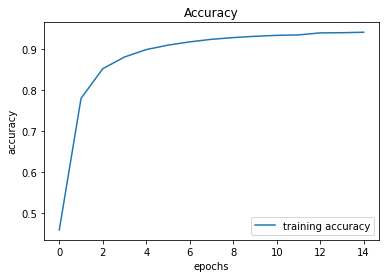

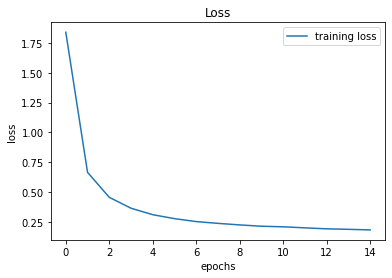

In [16]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
#plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
#plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_traffic_signs.h5')

In [21]:
# Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Data/Test/00007.png', target_size = (30,30))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [22]:
result

array([[3.50652146e-12, 6.56380337e-08, 2.31164784e-04, 3.72525477e-08,
        9.99679208e-01, 1.47920403e-07, 2.84178103e-08, 2.93376388e-07,
        7.09592143e-07, 1.09034723e-07, 1.53609547e-09, 2.42608378e-10,
        8.78404265e-08, 3.38240085e-07, 2.23278573e-09, 1.16972924e-11,
        3.37825377e-08, 5.43232213e-12, 2.17506255e-07, 1.56946908e-06,
        2.04598261e-13, 1.94013801e-08, 2.68093938e-08, 5.34599451e-07,
        2.62990937e-07, 5.06775955e-09, 2.13345811e-06, 1.04431281e-08,
        3.28151344e-07, 1.28772933e-06, 2.84211032e-09, 3.37606026e-10,
        5.51116500e-06, 2.92806862e-10, 3.61910590e-09, 7.91154434e-07,
        6.66803288e-08, 1.19735395e-08, 1.81819274e-07, 4.57663027e-08,
        2.38599185e-08, 2.52614569e-07, 7.44054123e-05]], dtype=float32)